### Dimensionality Reduction

In [37]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd

# Increase Pandas Max Display Columns
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
# Read cleaned_transactions.csv
tx_df = pd.read_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\ML ORIGINAL\\PROJECT 4\\Project 4 Workbook Bundle\\project_files\\My files\\cleaned_transactions.csv')

In [4]:
tx_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583,France,10.2
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583,France,15.6


In [5]:
# First 10 StockCodes and Descriptions
tx_df[['StockCode', 'Description']].head(10)

,StockCode,Description
0,22728,ALARM CLOCK BAKELIKE PINK
1,22727,ALARM CLOCK BAKELIKE RED
2,22726,ALARM CLOCK BAKELIKE GREEN
3,21724,PANDA AND BUNNIES STICKER SHEET
4,21883,STARS GIFT TAPE
5,10002,INFLATABLE POLITICAL GLOBE
6,21791,VINTAGE HEADS AND TAILS CARD GAME
7,21035,SET/2 RED RETROSPOT TEA TOWELS
8,22326,ROUND SNACK BOXES SET OF4 WOODLAND
9,22629,SPACEBOY LUNCH BOX


just within the first 10 transactions, we have 10 different items!

In [6]:
# Number of unique items
len(tx_df.StockCode.unique())

2574

In [7]:
# Create toy_df
toy_df = tx_df[tx_df.CustomerID.isin([14566, 17844])]

# Display toy_df
toy_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
19250,563900,85099C,JUMBO BAG BAROQUE BLACK WHITE,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19251,563900,85099B,JUMBO BAG RED RETROSPOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19252,563900,23199,JUMBO BAG APPLES,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19253,563900,22386,JUMBO BAG PINK POLKADOT,200,8/21/11 11:05,1.79,14566,Channel Islands,358.00
19851,564428,21993,FLORAL FOLK STATIONERY SET,12,8/25/11 11:27,1.25,17844,Canada,15.00
19852,564428,23295,SET OF 12 MINI LOAF BAKING CASES,8,8/25/11 11:27,0.83,17844,Canada,6.64
19853,564428,23293,SET OF 12 FAIRY CAKE BAKING CASES,16,8/25/11 11:27,0.83,17844,Canada,13.28
19854,564428,23296,SET OF 6 TEA TIME BAKING CASES,8,8/25/11 11:27,1.25,17844,Canada,10.00
19855,564428,23294,SET OF 6 SNACK LOAF BAKING CASES,8,8/25/11 11:27,0.83,17844,Canada,6.64


#### Rolling up item information to the customer level

In [13]:
# Get item_dummies
item_dummies = pd.get_dummies( tx_df.StockCode )

# Add CustomerID to item_dummies
item_dummies['CustomerID'] = tx_df.CustomerID

# Display first 5 rows of item_dummies
item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12583


There are MANY features in this item dummies dataset and most of the values are 0, indicating most items are not widely popular

In [14]:
# Create item_data by aggregating at customer level
item_data = item_dummies.groupby('CustomerID').sum()

# Display first 5 rows of item_data
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5


Even after rolling up to the customer level, most of the values are still 0

In [15]:
# Total times each item was purchased
item_data.sum()

10002        12
10120         1
10125        13
10133         5
10135         4
11001         8
15034         5
15036        19
15039         3
15044A        6
15044B        3
15044C        2
15044D        4
15056BL      50
15056N       35
15056P       24
15058A        9
15058B        8
15058C        4
15060B       12
16008        11
16011         3
16012         4
16014        10
16016        16
16045         8
16048         8
16054         2
16156L        6
16156S       12
           ... 
90098         1
90099         2
90108         1
90114         1
90120B        1
90145         2
90160A        1
90160B        1
90160C        1
90160D        1
90161B        1
90161C        1
90161D        1
90162A        1
90162B        1
90164A        1
90170         1
90173         1
90184B        1
90184C        1
90192         1
90201A        1
90201B        3
90201C        2
90201D        1
90202D        1
90204         1
C2            6
M            34
POST       1055
Length: 2574, dtype: int

In [16]:
# Save item_data.csv
item_data.to_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 4\\Project 4 Workbook Bundle\\project_files\\My files\\item_data.csv')

### APPROACH 1 TO REDUCE DIMENSIONALITY - THRESHOLDS

> Keep popular items only.

> Assumption :Wish to keep item features for the 20 most popular items

In [17]:
# Display most popular 20 items
item_data.sum().sort_values().tail(20)

22961      114
22630      115
22139      117
21080      122
85099B     123
20726      123
20719      128
20750      132
23084      140
20725      141
21212      143
22551      158
22629      160
22328      166
21731      169
22556      179
22554      197
22423      222
22326      271
POST      1055
dtype: int64

In [18]:
# Get list of StockCodes for the 20 most popular items
top_20_items = item_data.sum().sort_values().tail(20).index

print( top_20_items )

Index(['22961', '22630', '22139', '21080', '85099B', '20726', '20719', '20750',
       '23084', '20725', '21212', '22551', '22629', '22328', '21731', '22556',
       '22554', '22423', '22326', 'POST'],
      dtype='object')


In [19]:
# Keep only features for top 20 items
top_20_item_data = item_data[top_20_items]

# Shape of remaining dataframe
top_20_item_data.shape  

(414, 20)

In [20]:
top_20_item_data.head()

,22961,22630,22139,21080,85099B,20726,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [21]:
# Save threshold_item_data.csv
top_20_item_data.to_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 4\\Project 4 Workbook Bundle\\project_files\\My files\\threshold_item_data.csv')

### APPROACH 2 TO REDUCE DIMENSIONALITY - Principal Component Analysis (PCA)

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [48]:
# Read item_data.csv
item_data = pd.read_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 4\\Project 4 Workbook Bundle\\project_files\\My files\\item_data.csv', index_col=0)

In [49]:
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5


In [50]:
# Display item_data's shape
item_data.shape

(414, 2574)

In [51]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
print( item_data_scaled[:5] )

[[-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.68068072]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
   0.38776219]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848  5.53128397
   0.65487292]]


C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\vijay\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [52]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
print( PC_items[:5] )

[[ 5.87614052e+00  4.82891689e+00 -4.95545069e-01 ... -6.62646278e-04
  -4.43629806e-05  7.79931675e-15]
 [-4.21983747e+00  1.22621722e+00 -1.88191211e+00 ... -2.11471782e-04
  -2.69154340e-04 -4.33507397e-15]
 [-1.26084676e+00  2.38766371e+00 -7.31483440e-02 ...  2.57750179e-04
  -2.05682324e-04 -5.17554749e-15]
 [-4.92931983e+00 -7.14858724e-01 -1.58093026e+00 ... -1.98603886e-03
   9.92316312e-05 -9.78991194e-15]
 [-2.05311348e+00  2.11095022e+00  1.84807021e-01 ... -3.43415269e-04
  -1.32981672e-04  2.77555756e-17]]


In [54]:
# Sum of explained variance ratio
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [55]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

In [56]:
cumulative_explained_variance

array([0.03281833, 0.05292156, 0.07128859, 0.08834683, 0.10391887,
       0.11922182, 0.13390044, 0.14777137, 0.16127588, 0.17434025,
       0.18695338, 0.1995199 , 0.21182718, 0.22367916, 0.23550723,
       0.24697845, 0.25820255, 0.26910679, 0.27961003, 0.28997312,
       0.30006835, 0.30985469, 0.31927695, 0.32847657, 0.33758434,
       0.34652424, 0.35538227, 0.36407371, 0.37260634, 0.38101161,
       0.38913299, 0.39721182, 0.40514897, 0.41299377, 0.4207684 ,
       0.42837892, 0.43582988, 0.44318642, 0.45027387, 0.45718729,
       0.46405177, 0.4708825 , 0.47751492, 0.48404765, 0.49045639,
       0.49674262, 0.50289132, 0.50895164, 0.5150068 , 0.52101895,
       0.52682197, 0.53254779, 0.53817859, 0.54372429, 0.5492262 ,
       0.55464363, 0.5599654 , 0.56523128, 0.57046929, 0.57561171,
       0.58064864, 0.58566081, 0.59065011, 0.5955461 , 0.600354  ,
       0.60514319, 0.6098427 , 0.61446826, 0.61905662, 0.62360327,
       0.62804536, 0.63246525, 0.63682408, 0.64111869, 0.64527

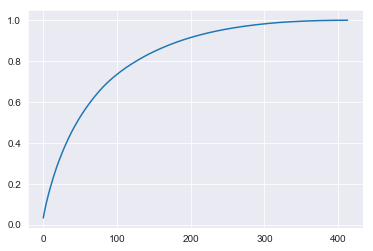

In [57]:
# Plot cumulative explained variance
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.show()

About 80% of the variance can be captured with 125 components.

In [58]:
# How much variance we'd capture with the first 125 components
print( cumulative_explained_variance[124] )

0.7955069032205401


#### Initialize and fit another PCA transformation.

In [59]:
# Initialize PCA transformation, only keeping 125 components
pca = PCA(n_components=125)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 125)

#### Next, for convenience, put PC_items into a new dataframe.

In [60]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

In [61]:
items_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124
0,5.876143,4.828939,-0.495539,3.093843,-0.633766,-11.534105,2.161996,7.117049,5.336088,4.424445,4.636863,2.316525,12.310489,1.986614,-11.431172,5.617879,-2.177303,7.665900,-12.135780,-16.049024,-5.949558,7.813699,40.517852,-35.576528,-17.557139,6.871311,20.885213,2.296090,-26.158313,-32.580721,7.883451,12.357731,6.827979,-32.957106,-4.401086,-17.241513,-11.274284,-14.484447,-2.765498,4.741846,-6.981413,-1.470543,10.604386,1.242350,3.084317,5.335397,-0.410427,1.660712,-6.375942,3.060624,...,2.312373,2.542504,-1.037424,-1.695226,-1.865737,1.252494,0.483867,-1.360120,-2.192800,-3.544069,0.440890,-2.021701,0.432976,0.301805,1.152574,-1.998654,0.341165,0.501707,-0.196120,0.470349,-0.774897,-0.780191,-0.070769,0.209395,-0.073929,-1.228844,-0.377562,-1.105840,0.143241,0.494132,0.216092,-0.519854,-1.158772,-1.014214,0.303598,0.618119,0.681728,0.739675,0.528379,0.337376,0.015766,0.186918,0.518042,0.179653,0.146852,0.991325,-0.191077,0.071199,-0.030373,-0.372192
1,-4.219848,1.226256,-1.882030,-0.174184,0.817993,1.160799,-0.871792,-0.846361,0.460747,0.854278,-0.402563,0.981631,-1.104654,0.770658,-0.093540,-0.312786,-0.447952,1.206894,0.382737,-0.469562,0.184119,0.052817,0.498841,0.372724,1.225110,-0.773002,-0.269983,0.851526,-0.372271,-0.576563,1.013188,-0.579983,0.947624,-0.736052,0.355431,-0.388675,-0.300498,0.390347,0.153555,0.328564,-0.469241,0.703062,1.201879,-0.209572,-0.883342,-0.039789,-0.422899,-1.641626,-0.414965,0.441433,...,-1.126328,-0.934006,-0.493265,-0.354093,-0.296773,-0.001522,-0.684608,-0.288711,0.756771,0.112502,0.244329,-0.056577,-2.050545,-0.413470,-0.353261,-1.063864,-0.146145,1.143562,-0.444852,0.719717,-1.165818,0.496257,1.711301,0.775681,0.668936,1.174420,1.073476,-1.035425,-0.666613,0.759116,1.541853,-0.801077,0.057445,2.451206,-0.263822,-0.122360,-1.564763,-0.522741,-1.128166,-1.231214,2.548724,-0.037701,0.109399,-0.466872,0.039144,-0.534724,1.037625,1.083158,-0.456615,1.390746
2,-1.260842,2.387646,-0.073173,-1.118978,-0.034734,-3.715386,-0.343614,-0.148532,-0.789656,-0.379136,1.570487,0.182851,0.223808,-0.050876,3.178291,-0.512307,-1.841168,0.382440,0.316475,-0.000740,-0.423433,0.457804,-0.788313,1.745987,-1.481177,0.753959,-0.911272,0.774898,0.502965,-1.352556,0.281973,0.672566,0.078134,-0.216894,-0.664034,-1.535500,0.776339,-1.417875,-0.093956,-0.917749,0.098979,-0.097661,-0.176416,0.690403,1.389987,-0.236730,-0.091190,-0.176238,0.861539,1.722009,...,2.264784,-0.799831,1.713876,0.500390,1.046377,-0.016537,-1.235001,0.842689,1.362108,-0.434998,1.610826,1.139239,-1.753703,-2.835106,1.023549,-2.196754,-1.606318,-2.759951,-1.197755,-0.855924,0.523701,-0.387473,2.092506,0.037504,-1.470818,-1.223641,0.679377,2.062584,3.710943,-1.980879,2.090788,0.818177,-1.186676,2.497014,-2.637434,-1.656170,-1.090740,0.006160,0.942665,-0.038280,-4.281430,0.964036,2.182912,-1.465909,-0.960800,4.612621,-3.253815,-4.639689,-0.736980,-3.884335
3,-4.929322,-0.714839,-1.580967,-0.469799,-0.116446,0.647823,0.113137,-1.336039,1.547084,-1.190291,-0.212795,1.056886,-0.474871,0.856248,-1.305630,0.243004,0.268050,1.952219,-0.228356,0.570002,-0.186411,0.902526,1.363931,0.177001,-0.258163,-0.167878,-0.681215,1.078430,-0.155415,-0.398397,0.240186,0.633905,-1.445107,-0.187308,-0.315448,-0.307001,-1.359204,-0.004938,0.580457,-0.246569,0.586602,-0.225486,0.298540,0.520478,-0.531385,-0.095854,-1.467963,0.130504,0.139848,-0.670308,...,1.664018,-0.176972,0.600104,0.546130,-0.603674,-0.043256,-1.722092,0.071021,0.927078,-0.219563,0.457798,-0.043691,-0.035070,-0.233138,-0.456576,0.238809,0.441111,-0.206102,-0.246401,0.752453,-0.116476,-0.861572,-0.546099,-1.122834,0.449205,0.070048,0.286284,0.254150,0.200580,-0.199345,-0.184877,0.969396,

In [62]:
# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

In [63]:
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
0,5.876143,4.828939,-0.495539,3.093843,-0.633766,-11.534105,2.161996,7.117049,5.336088,4.424445,4.636863,2.316525,12.310489,1.986614,-11.431172,5.617879,-2.177303,7.665900,-12.135780,-16.049024,-5.949558,7.813699,40.517852,-35.576528,-17.557139,6.871311,20.885213,2.296090,-26.158313,-32.580721,7.883451,12.357731,6.827979,-32.957106,-4.401086,-17.241513,-11.274284,-14.484447,-2.765498,4.741846,-6.981413,-1.470543,10.604386,1.242350,3.084317,5.335397,-0.410427,1.660712,-6.375942,3.060624,...,2.312373,2.542504,-1.037424,-1.695226,-1.865737,1.252494,0.483867,-1.360120,-2.192800,-3.544069,0.440890,-2.021701,0.432976,0.301805,1.152574,-1.998654,0.341165,0.501707,-0.196120,0.470349,-0.774897,-0.780191,-0.070769,0.209395,-0.073929,-1.228844,-0.377562,-1.105840,0.143241,0.494132,0.216092,-0.519854,-1.158772,-1.014214,0.303598,0.618119,0.681728,0.739675,0.528379,0.337376,0.015766,0.186918,0.518042,0.179653,0.146852,0.991325,-0.191077,0.071199,-0.030373,-0.372192
1,-4.219848,1.226256,-1.882030,-0.174184,0.817993,1.160799,-0.871792,-0.846361,0.460747,0.854278,-0.402563,0.981631,-1.104654,0.770658,-0.093540,-0.312786,-0.447952,1.206894,0.382737,-0.469562,0.184119,0.052817,0.498841,0.372724,1.225110,-0.773002,-0.269983,0.851526,-0.372271,-0.576563,1.013188,-0.579983,0.947624,-0.736052,0.355431,-0.388675,-0.300498,0.390347,0.153555,0.328564,-0.469241,0.703062,1.201879,-0.209572,-0.883342,-0.039789,-0.422899,-1.641626,-0.414965,0.441433,...,-1.126328,-0.934006,-0.493265,-0.354093,-0.296773,-0.001522,-0.684608,-0.288711,0.756771,0.112502,0.244329,-0.056577,-2.050545,-0.413470,-0.353261,-1.063864,-0.146145,1.143562,-0.444852,0.719717,-1.165818,0.496257,1.711301,0.775681,0.668936,1.174420,1.073476,-1.035425,-0.666613,0.759116,1.541853,-0.801077,0.057445,2.451206,-0.263822,-0.122360,-1.564763,-0.522741,-1.128166,-1.231214,2.548724,-0.037701,0.109399,-0.466872,0.039144,-0.534724,1.037625,1.083158,-0.456615,1.390746
2,-1.260842,2.387646,-0.073173,-1.118978,-0.034734,-3.715386,-0.343614,-0.148532,-0.789656,-0.379136,1.570487,0.182851,0.223808,-0.050876,3.178291,-0.512307,-1.841168,0.382440,0.316475,-0.000740,-0.423433,0.457804,-0.788313,1.745987,-1.481177,0.753959,-0.911272,0.774898,0.502965,-1.352556,0.281973,0.672566,0.078134,-0.216894,-0.664034,-1.535500,0.776339,-1.417875,-0.093956,-0.917749,0.098979,-0.097661,-0.176416,0.690403,1.389987,-0.236730,-0.091190,-0.176238,0.861539,1.722009,...,2.264784,-0.799831,1.713876,0.500390,1.046377,-0.016537,-1.235001,0.842689,1.362108,-0.434998,1.610826,1.139239,-1.753703,-2.835106,1.023549,-2.196754,-1.606318,-2.759951,-1.197755,-0.855924,0.523701,-0.387473,2.092506,0.037504,-1.470818,-1.223641,0.679377,2.062584,3.710943,-1.980879,2.090788,0.818177,-1.186676,2.497014,-2.637434,-1.656170,-1.090740,0.006160,0.942665,-0.038280,-4.281430,0.964036,2.182912,-1.465909,-0.960800,4.612621,-3.253815,-4.639689,-0.736980,-3.884335
3,-4.929322,-0.714839,-1.580967,-0.469799,-0.116446,0.647823,0.113137,-1.336039,1.547084,-1.190291,-0.212795,1.056886,-0.474871,0.856248,-1.305630,0.243004,0.268050,1.952219,-0.228356,0.570002,-0.186411,0.902526,1.363931,0.177001,-0.258163,-0.167878,-0.681215,1.078430,-0.155415,-0.398397,0.240186,0.633905,-1.445107,-0.187308,-0.315448,-0.307001,-1.359204,-0.004938,0.580457,-0.246569,0.586602,-0.225486,0.298540,0.520478,-0.531385,-0.095854,-1.467963,0.130504,0.139848,-0.670308,...,1.664018,-0.176972,0.600104,0.546130,-0.603674,-0.043256,-1.722092,0.071021,0.927078,-0.219563,0.457798

In [64]:
# Update its index
items_pca.index = item_data.index

items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876143,4.828939,-0.495539,3.093843,-0.633766,-11.534105,2.161996,7.117049,5.336088,4.424445,4.636863,2.316525,12.310489,1.986614,-11.431172,5.617879,-2.177303,7.665900,-12.135780,-16.049024,-5.949558,7.813699,40.517852,-35.576528,-17.557139,6.871311,20.885213,2.296090,-26.158313,-32.580721,7.883451,12.357731,6.827979,-32.957106,-4.401086,-17.241513,-11.274284,-14.484447,-2.765498,4.741846,-6.981413,-1.470543,10.604386,1.242350,3.084317,5.335397,-0.410427,1.660712,-6.375942,3.060624,...,2.312373,2.542504,-1.037424,-1.695226,-1.865737,1.252494,0.483867,-1.360120,-2.192800,-3.544069,0.440890,-2.021701,0.432976,0.301805,1.152574,-1.998654,0.341165,0.501707,-0.196120,0.470349,-0.774897,-0.780191,-0.070769,0.209395,-0.073929,-1.228844,-0.377562,-1.105840,0.143241,0.494132,0.216092,-0.519854,-1.158772,-1.014214,0.303598,0.618119,0.681728,0.739675,0.528379,0.337376,0.015766,0.186918,0.518042,0.179653,0.146852,0.991325,-0.191077,0.071199,-0.030373,-0.372192
12348,-4.219848,1.226256,-1.882030,-0.174184,0.817993,1.160799,-0.871792,-0.846361,0.460747,0.854278,-0.402563,0.981631,-1.104654,0.770658,-0.093540,-0.312786,-0.447952,1.206894,0.382737,-0.469562,0.184119,0.052817,0.498841,0.372724,1.225110,-0.773002,-0.269983,0.851526,-0.372271,-0.576563,1.013188,-0.579983,0.947624,-0.736052,0.355431,-0.388675,-0.300498,0.390347,0.153555,0.328564,-0.469241,0.703062,1.201879,-0.209572,-0.883342,-0.039789,-0.422899,-1.641626,-0.414965,0.441433,...,-1.126328,-0.934006,-0.493265,-0.354093,-0.296773,-0.001522,-0.684608,-0.288711,0.756771,0.112502,0.244329,-0.056577,-2.050545,-0.413470,-0.353261,-1.063864,-0.146145,1.143562,-0.444852,0.719717,-1.165818,0.496257,1.711301,0.775681,0.668936,1.174420,1.073476,-1.035425,-0.666613,0.759116,1.541853,-0.801077,0.057445,2.451206,-0.263822,-0.122360,-1.564763,-0.522741,-1.128166,-1.231214,2.548724,-0.037701,0.109399,-0.466872,0.039144,-0.534724,1.037625,1.083158,-0.456615,1.390746
12349,-1.260842,2.387646,-0.073173,-1.118978,-0.034734,-3.715386,-0.343614,-0.148532,-0.789656,-0.379136,1.570487,0.182851,0.223808,-0.050876,3.178291,-0.512307,-1.841168,0.382440,0.316475,-0.000740,-0.423433,0.457804,-0.788313,1.745987,-1.481177,0.753959,-0.911272,0.774898,0.502965,-1.352556,0.281973,0.672566,0.078134,-0.216894,-0.664034,-1.535500,0.776339,-1.417875,-0.093956,-0.917749,0.098979,-0.097661,-0.176416,0.690403,1.389987,-0.236730,-0.091190,-0.176238,0.861539,1.722009,...,2.264784,-0.799831,1.713876,0.500390,1.046377,-0.016537,-1.235001,0.842689,1.362108,-0.434998,1.610826,1.139239,-1.753703,-2.835106,1.023549,-2.196754,-1.606318,-2.759951,-1.197755,-0.855924,0.523701,-0.387473,2.092506,0.037504,-1.470818,-1.223641,0.679377,2.062584,3.710943,-1.980879,2.090788,0.818177,-1.186676,2.497014,-2.637434,-1.656170,-1.090740,0.006160,0.942665,-0.038280,-4.281430,0.964036,2.182912,-1.465909,-0.960800,4.612621,-3.253815,-4.639689,-0.736980,-3.884335
12350,-4.929322,-0.714839,-1.580967,-0.469799,-0.116446,0.647823,0.113137,-1.336039,1.547084,-1.190291,-0.212795,1.056886,-0.474871,0.856248,-1.305630,0.243004,0.268050,1.952219,-0.228356,0.570002,-0.186411,0.902526,1.363931,0.177001,-0.258163,-0.167878,-0.681215,1.078430,-0.155415,-0.398397,0.240186,0.633905,-1.445107,-0.187308,-0.315448,-0.307001,-1.359204,-0.004938,0.580457,-0.246569,0.586602,-0.225486,0.298540,0.520478,-0.531385,-0.095854,-1.467963,0.13050

Now we have a dataframe of 125 customer-level principal component features. These were generated from the 125 principal components that explained the most variance for the original features. The index of this PCA item dataframe contains CustomerID's, which will make it possible for us to join this to our analytical base table from Module 1.

In [65]:
# Save pca_item_data.csv
items_pca.to_csv('D:\\KOMAL LEARNING\\ELITE DATA SCIENCE\\ML ORIGINAL\\PROJECT 4\\Project 4 Workbook Bundle\\project_files\\My files\\pca_item_data.csv')